In [ ]:
import matplotlib.pyplot as plt
import time
import numpy as np
import random
import sys

# Create a list of 10 million integers
integers_list = [i for i in range(10000000)]

# Calculate the memory usage
size_in_bytes = sys.getsizeof(integers_list)

print(f"Approximate size of list containing 10 million integers: {size_in_bytes / (1024 * 1024)} MB")


Approximate size of list containing 10 million integers: 84.96776580810547 MB


In [ ]:
# Merge Sort Algorithm

# Set small integer S as threshold for size of subarray
# Set S as 10


def merge_sort(arr):
    comparisons = 0  # Initialize comparison counter

    if len(arr) <= 1:
        return arr, comparisons

    # Split the input array into two halves
    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    # Recursively sort both halves and increment comparisons
    left_half, comparisons_left = merge_sort(left_half)
    right_half, comparisons_right = merge_sort(right_half)
    comparisons += comparisons_left + comparisons_right  # Increment comparisons with comparisons from left and right halves

    # Merge the sorted halves and return comparisons
    merged_arr, comparisons_merge = merge(left_half, right_half)
    comparisons += comparisons_merge

    return merged_arr, comparisons

# Merge function returns the merged array and the number of comparisons made
def merge(left, right):
    result = []
    left_index, right_index = 0, 0
    comparisons = 0  # Initialize comparison counter for merge

    while left_index < len(left) and right_index < len(right):
        if left[left_index] < right[right_index]:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1
        comparisons += 1  # Increment comparisons for each comparison made during merge

    # Append any remaining elements from both halves
    result.extend(left[left_index:])
    result.extend(right[right_index:])

    return result, comparisons





In [ ]:
# Hybrid Merge and Insertion Sort Algorithm

def hybrid_sort(arr, S):
    comparisons = 0
    comparisons_merge = 0

    if len(arr) <= S:

      comparisons += insertion_sort(arr)

    else:
      _,left_comp = hybrid_sort(arr[:(len(arr) // 2)], S)
      _,right_comp= hybrid_sort(arr[(len(arr) // 2):], S)
      comparisons += left_comp + right_comp
      _, comparisons_merge = merge(arr[:(len(arr) // 2)], arr[(len(arr) // 2):]) #_, is used to indicate that first value will not be used

      comparisons += comparisons_merge

    return arr, comparisons


#Insertion Sort


def insertion_sort(arr):
    comparisons = 0
    input_arr = arr

    for i in range(1, len(input_arr)):
        key = input_arr[i]  # Current element to be inserted
        j = i - 1

        # Move elements of arr[0..i-1] that are greater than key one position ahead
        while j >= 0 and key < input_arr[j]:
            input_arr[j + 1] = input_arr[j]
            j -= 1
            comparisons +=1

        # Insert the key into its correct position
        input_arr[j + 1] = key

    return comparisons








In [ ]:
#Algorithm testing

#ran_arr = [random.randint(1,100) for i in range(100)]
ran_arr = [72, 8, 9, 36, 80, 21, 22, 42, 45, 87, 72, 25, 9, 84, 9, 19, 48, 38, 12, 94, 64, 65, 71, 25, 46, 2, 2, 30, 47, 93]

sorted_arr_hybrid, comparisons = hybrid_sort(ran_arr, 5)
sorted_arr_merge, comparisons_merge = merge_sort(ran_arr)
sorted_arr_insert = insertion_sort(ran_arr)


print("Sorted Array:  ", sorted_arr_hybrid)
print("Comparisons (Insertion Sort): " , sorted_arr_insert)
print("Comparisons (Merge Sort): " , comparisons_merge)
print("Comparisons (Hybrid Sort): ", comparisons)

comparison_values = []  # Store the number of comparisons for each S value
S_values = list(range(1, 31))  # List of S values for x-axis labels

for S in S_values:
    ran_arr = [72, 8, 9, 36, 80, 21, 22, 42, 45, 87, 72, 25, 9, 84, 9, 19, 48, 38, 12, 94, 64, 65, 71, 25, 46, 2, 2, 30, 47, 93]
    _, comparisons_HS = hybrid_sort(ran_arr, S)
    comparison_values.append(comparisons_HS)

print("S_values:", S_values)  # Debugging: Print S_values
print("comparison_values:", comparison_values)  # Debugging: Print comparison_values


Sorted Array:   [2, 2, 8, 9, 9, 9, 12, 19, 21, 22, 25, 25, 30, 36, 38, 42, 45, 46, 47, 48, 64, 65, 71, 72, 72, 80, 84, 87, 93, 94]
Comparisons (Insertion Sort):  200
Comparisons (Merge Sort):  111
Comparisons (Hybrid Sort):  79
S_values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
comparison_values: [91, 83, 82, 79, 79, 79, 77, 83, 83, 83, 83, 83, 83, 83, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 200]


Algo analysis (theory)



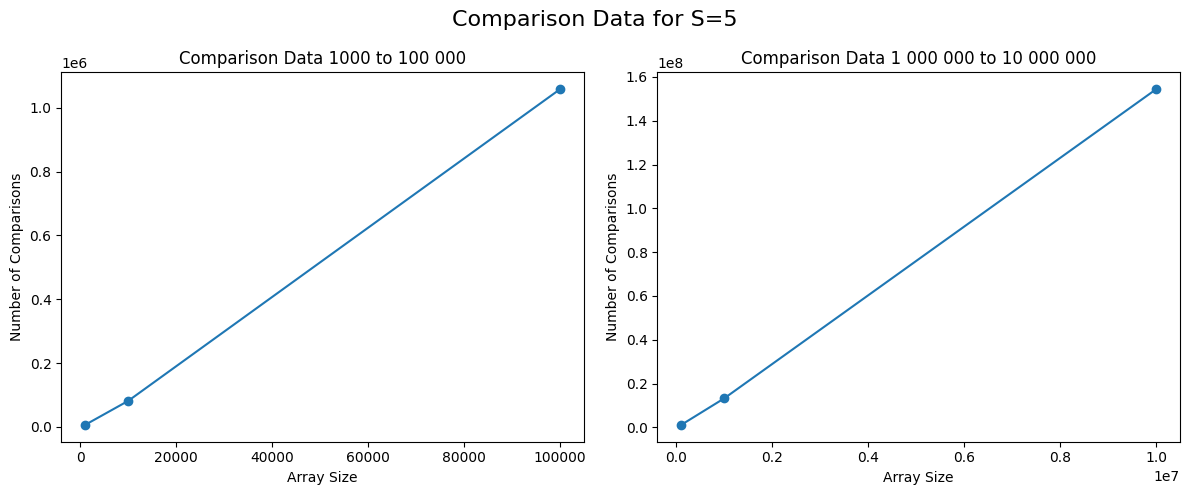

In [ ]:
#(C)(i) key comparison vs input size
# changing input size, plot number of key comparisons
#Set S as 5

def fixed_S(S):
    array_size1 = [1000, 10000, 100000]
    array_size2 = [100000, 1000000, 10000000]
    comparison_array1 = []
    comparison_array2 = []

    for size in array_size1:
        random_array = [random.randint(1, 10000000) for _ in range(size)]
        _, comparisons = hybrid_sort(random_array, S)
        comparison_array1.append(comparisons)

    for size in array_size2:
        random_array = [random.randint(1, 10000000) for _ in range(size)]
        _, comparisons = hybrid_sort(random_array, S)
        comparison_array2.append(comparisons)

    # Plotting
    # Create a single figure with two subplots in a 1x2 grid
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the first data in the first subplot
    ax1.plot(array_size1, comparison_array1, marker='o', linestyle='-')
    ax1.set_xlabel('Array Size')
    ax1.set_ylabel('Number of Comparisons')
    ax1.set_title('Comparison Data 1000 to 100 000')

    # Plot the second data in the second subplot
    ax2.plot(array_size2, comparison_array2, marker='o', linestyle='-')
    ax2.set_xlabel('Array Size')
    ax2.set_ylabel('Number of Comparisons')
    ax2.set_title('Comparison Data 1 000 000 to 10 000 000')

    fig.suptitle(f'Comparison Data for S={S}', fontsize = 16)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plots
    plt.show()

# Example usage
fixed_S(5)  # Replace 5 with your desired threshold 'S'


S_values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
comparison_values: [88157, 86132, 85269, 85175, 85433, 85433, 85433, 85433, 86403, 91172, 91172, 91172, 91172, 91172, 91172, 91172, 91172, 91172, 99193, 109221]


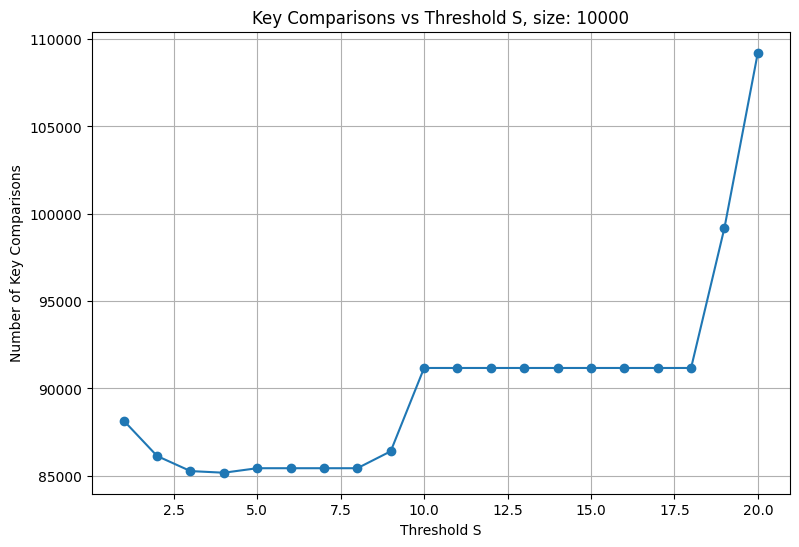

In [ ]:
# C(ii) fix input size, change S values
#10000 case

def key_comparisons(array_size, S_size):
    comparison_values = []  # Store the number of comparisons for each S value
    random_array = [random.randint(1, 10000) for _ in range(array_size)]
    S_values = list(range(1, S_size + 1))  # List of S values for x-axis labels

    for S in S_values:
        _, comparisons = hybrid_sort(random_array, S)
        comparison_values.append(comparisons)

    print("S_values:", S_values)  # Debugging: Print S_values
    print("comparison_values:", comparison_values)  # Debugging: Print comparison_values

    best_S_value = min(comparison_values)

    # Plot the results
    plt.figure(figsize=(9, 6))
    plt.plot(S_values, comparison_values, marker='o', linestyle='-', label="Comparisons")
    plt.xlabel('Threshold S')
    plt.ylabel('Number of Key Comparisons')

    plt.title('Key Comparisons vs Threshold S, size: ' + str(array_size))
    plt.grid(True)
    plt.show()

#key_comparisons(1000, 20)
key_comparisons(10000, 20)
#key_comparisons(100000, 20)



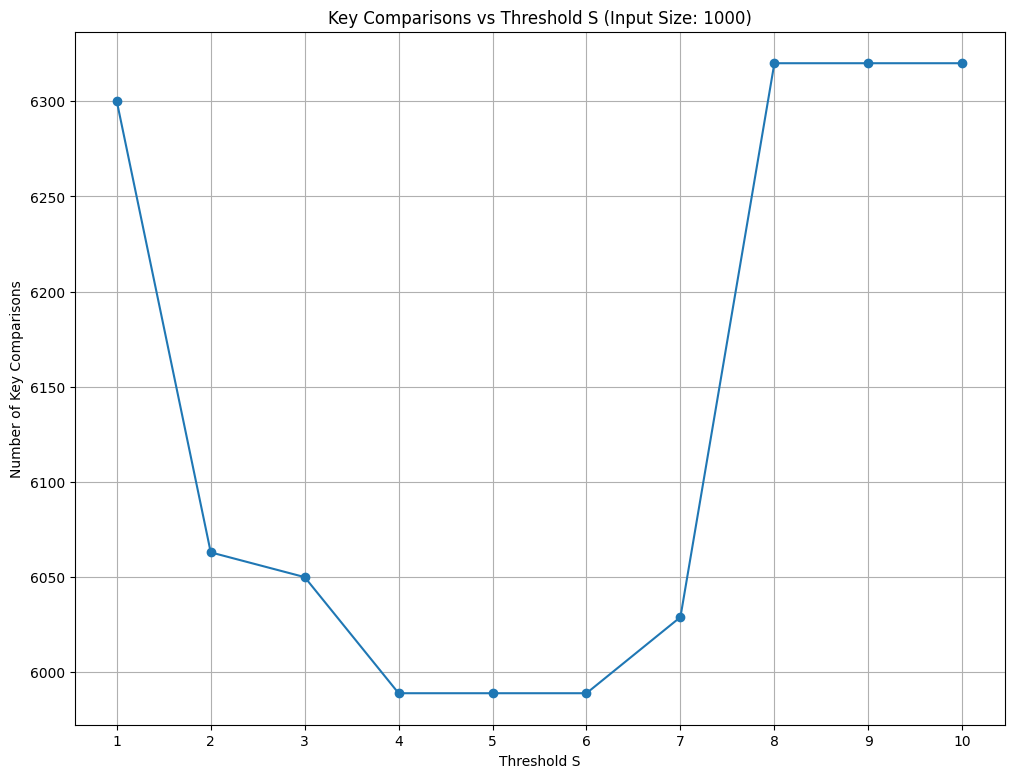

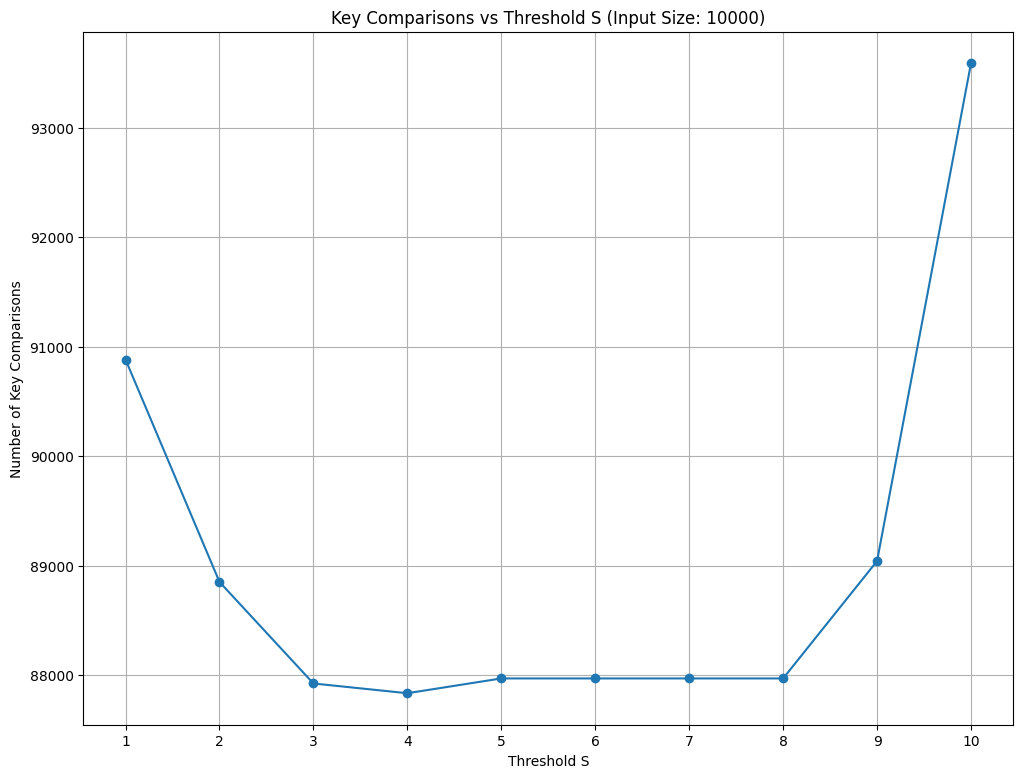

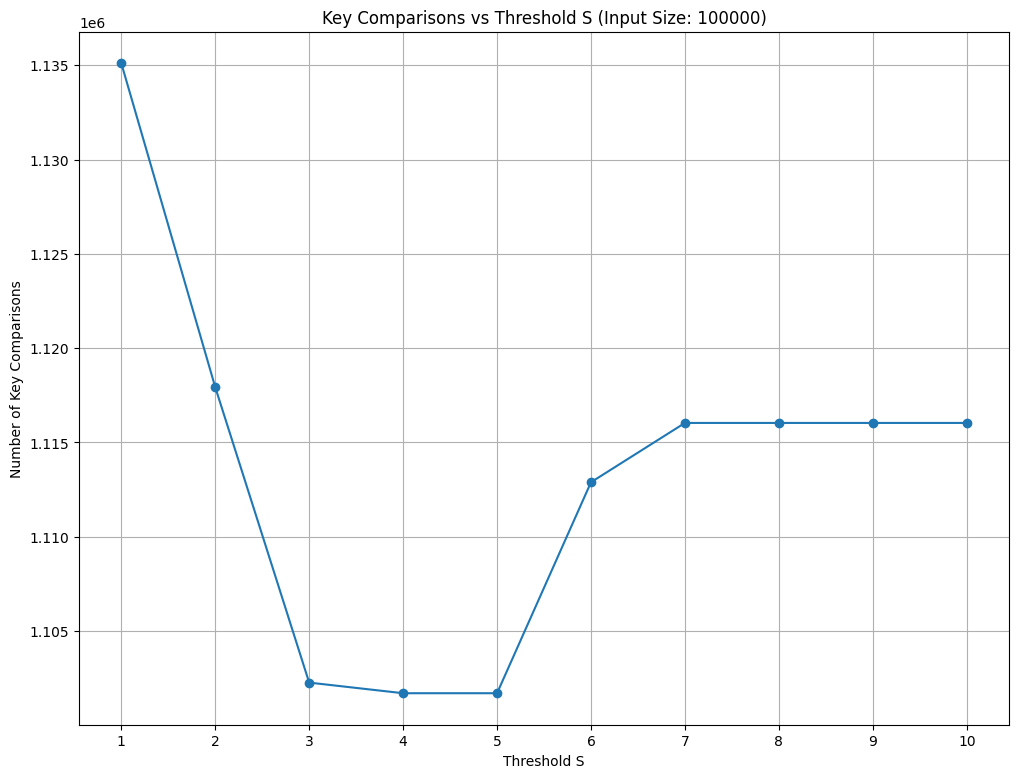

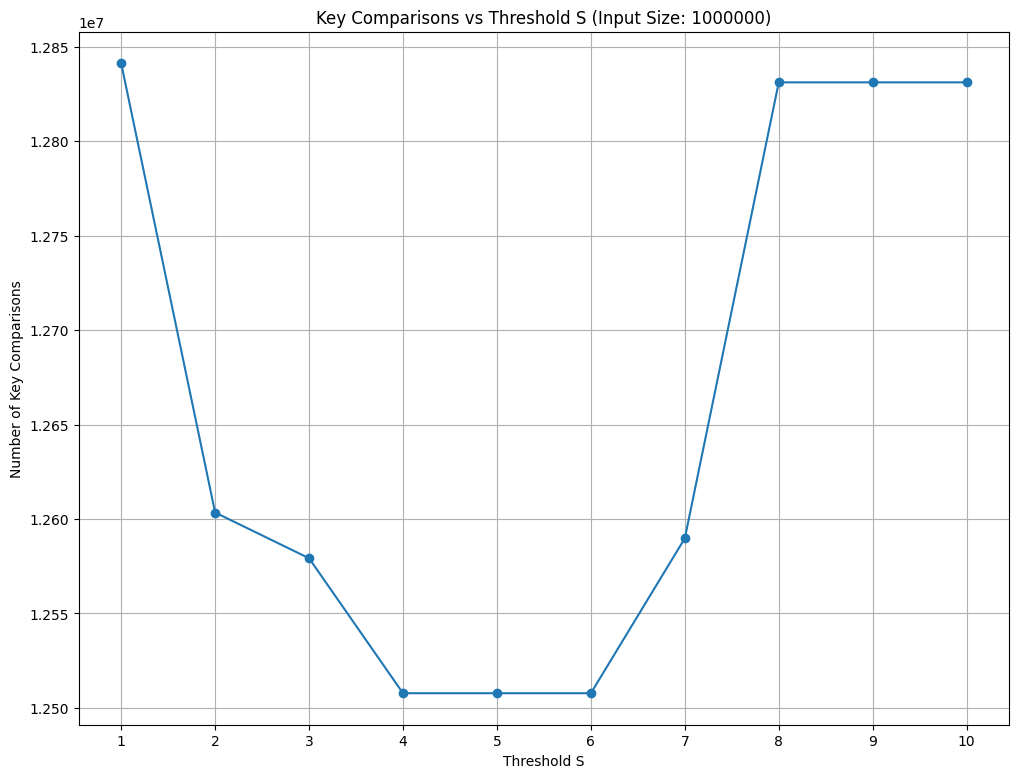

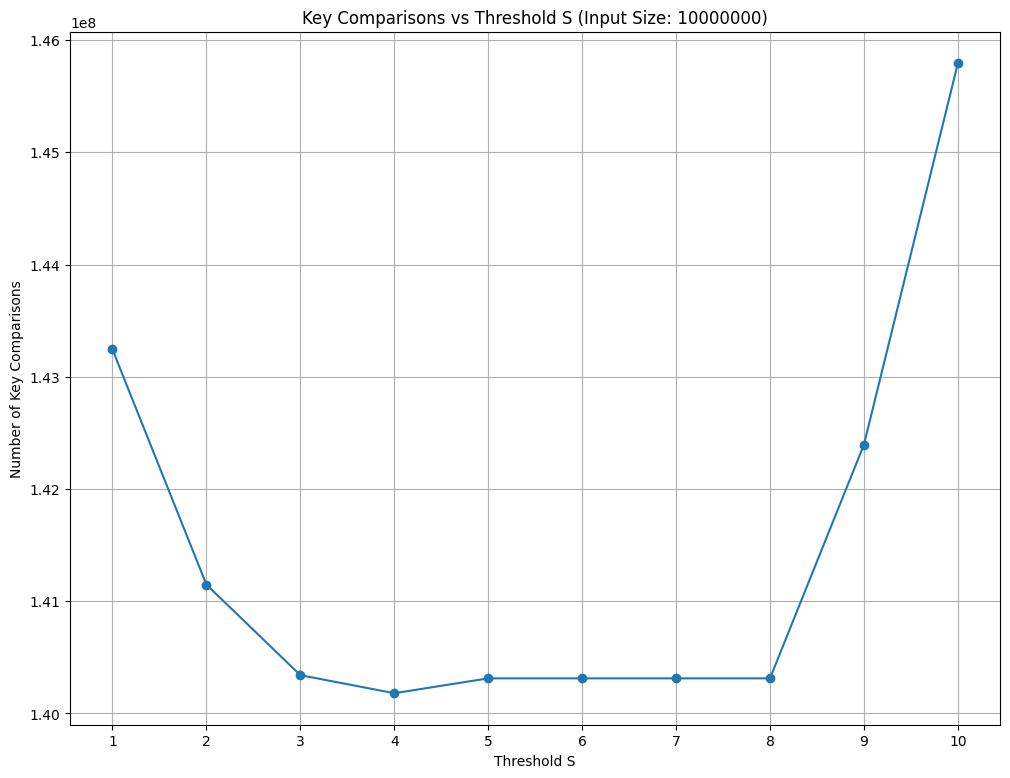

In [ ]:
#c(iii) using different input datasets, determine optimal S value

# Generate plots for different input sizes
input_sizes = [1000,10000,100000,1000000,10000000]
def key_comparisons_2(input_sizes,S_size):
    for array_size in input_sizes:
        comparison_values = []  # Store the number of comparisons for each S value
        random_array = [random.randint(1, 10000) for _ in range(array_size)]
        S_values = list(range(1, S_size + 1))

        for S in S_values:
            _, comparisons = hybrid_sort(random_array, S)
            comparison_values.append(comparisons)

        # Plot the results for this input size
        plt.figure(figsize=(12, 9))
        plt.plot(S_values, comparison_values, marker='o', linestyle='-')
        plt.xlabel('Threshold S')
        plt.xticks(range(1, len(S_values)+1, 1))
        plt.ylabel('Number of Key Comparisons')
        plt.title(f'Key Comparisons vs Threshold S (Input Size: {array_size})')
        plt.grid(True)
        plt.show()

# Generate plots for different input sizes
key_comparisons_2(input_sizes,10)


In [ ]:
#(d) Compare with original MergeSort
# convert into function and run S = 4 and 5.

comparison_array_HS = []
comparison_array_MS = []




random_array = [random.randint(1,10000000) for _ in range(10000000)]

start_HS = time.time()
_, comparisons_HS = hybrid_sort(random_array, 4)
end_HS = time.time()
HS_time = end_HS - start_HS
#comparison_array_HS.append(comparisons_HS)


start_MS = time.time()
_, comparisons_MS = merge_sort(random_array)
end_MS = time.time()
MS_time = end_MS - start_MS
#comparison_array_MS.append(comparisons_MS)

print("Comparisons (Hybrid Sort): ", comparisons_HS)
print("Time Taken (Hybrid Sort): " , HS_time)

print("Comparisons (Merge Sort): " , comparisons_MS)
print("Time Taken (Merge Sort): " , MS_time)


Comparisons (Hybrid Sort):  160750269
Time Taken (Hybrid Sort):  62.03741431236267
Comparisons (Merge Sort):  220099703
Time Taken (Merge Sort):  94.55747103691101


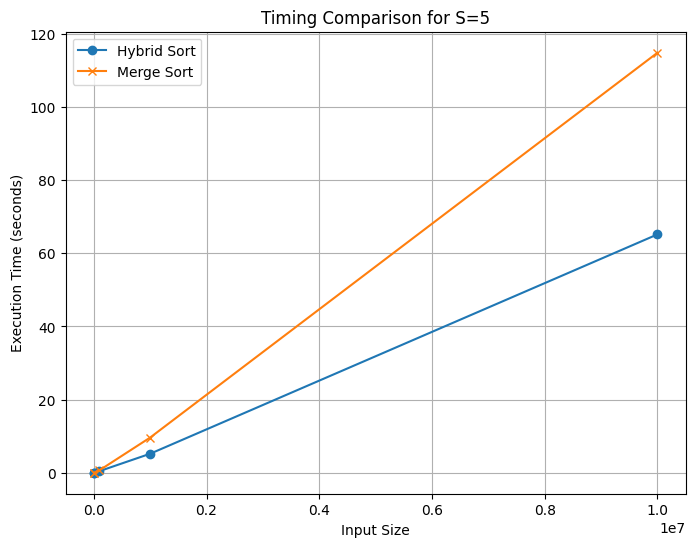

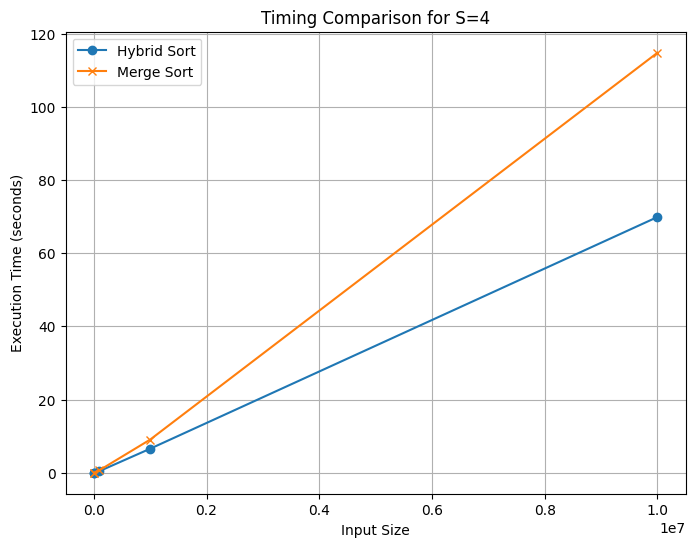

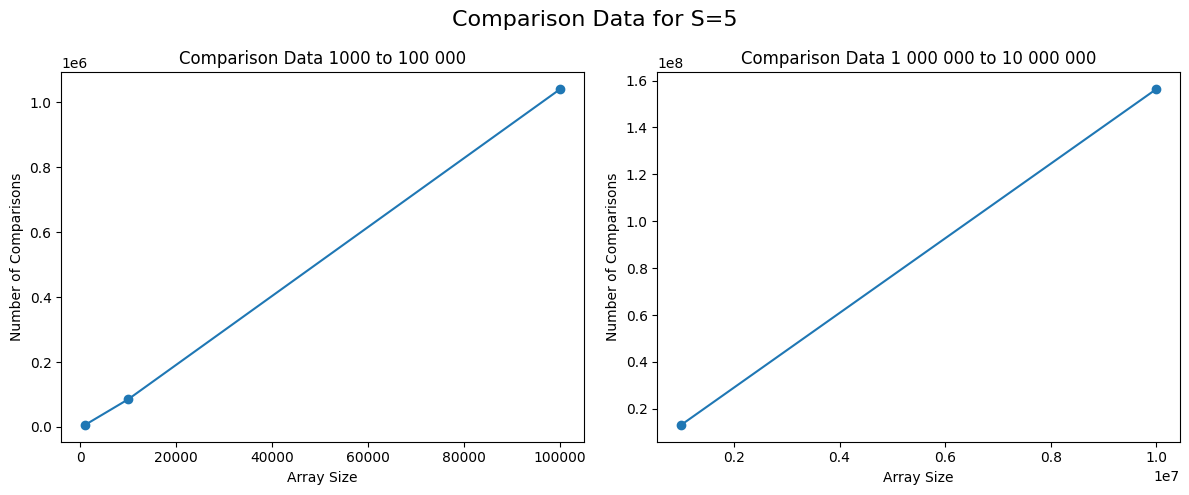

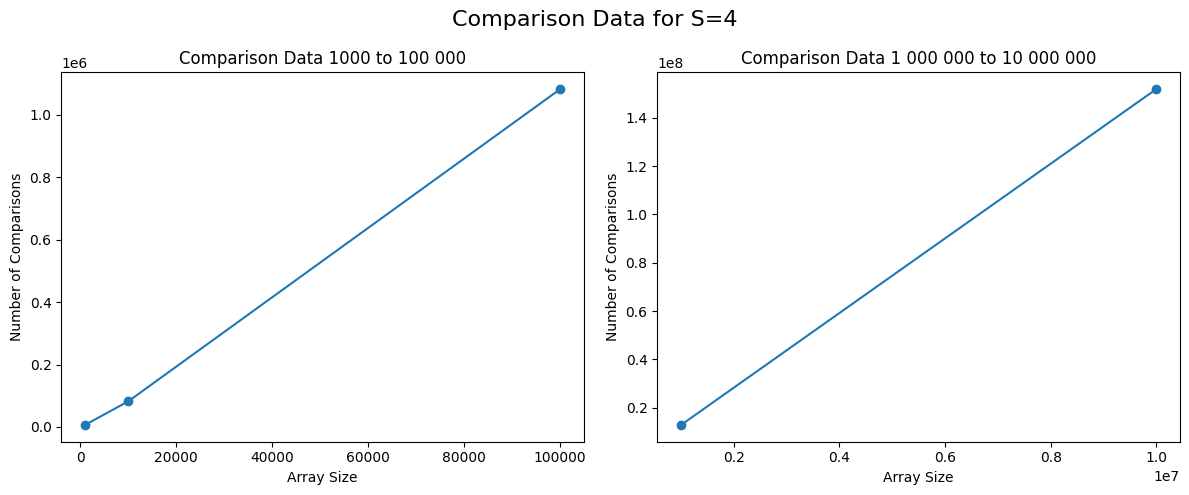

In [ ]:
def comparison(S):
    time_array_HS = []
    time_array_MS = []
    array_size = [1000, 10000, 100000, 1000000, 10000000]

    for size in array_size:
        random_array = [random.randint(1, 10000000) for _ in range(size)]

        # Hybrid sort
        start_HS = time.time()
        _, comparisonsHS = hybrid_sort(random_array, S)
        end_HS = time.time()
        HS_time = end_HS - start_HS  # Calculate the execution time
        time_array_HS.append(HS_time)

        # Merge sort
        start_MS = time.time()
        _, comparisonsMS = merge_sort(random_array)
        end_MS = time.time()
        MS_time = end_MS - start_MS  # Calculate the execution time
        time_array_MS.append(MS_time)

     # Ensure all lists have the same length
    assert len(array_size) == len(time_array_HS) == len(time_array_MS), "Lists must have the same length."

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(array_size, time_array_HS, marker='o', label='Hybrid Sort')
    plt.plot(array_size, time_array_MS, marker='x', label='Merge Sort')

    plt.xlabel('Input Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title(f'Timing Comparison for S={S}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
comparison(5)  # Replace 5 with your desired threshold 'S'
comparison(4)


fixed_S(5)
fixed_S(4)



